In [1]:
# libraries for manipulating, cleaning data
import pandas as pd
import numpy as np

# libraries for ploting
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for statisics
from scipy.stats import norm

# Importing data

In [2]:
# The file is save in the same folder with the notebook
# The file is an excel file
data = pd.read_excel("Dirty_Data.xlsx", header = [0,1])
data

Segment>>    Consumer                                        \
        Ship Mode>> First Class  Same Day Second Class Standard Class   
0          Order ID         NaN       NaN          NaN            NaN   
1    CA-2011-100293         NaN       NaN          NaN            NaN   
2    CA-2011-100706         NaN       NaN     129.4400            NaN   
3    CA-2011-100895         NaN       NaN          NaN       605.4700   
4    CA-2011-100916         NaN       NaN          NaN            NaN   
..              ...         ...       ...          ...            ...   
819  US-2014-166611         NaN       NaN          NaN            NaN   
820  US-2014-167920         NaN       NaN    1827.5100            NaN   
821  US-2014-168116         NaN       NaN          NaN            NaN   
822  US-2014-168690         NaN       NaN          NaN         2.8080   
823     Grand Total   20802.173  8132.409   49724.2545    116922.1345   

        Consumer Total   Corporate                                        \
    Unnamed: 5_level_1 First Class  Same Day Second Class Standard Class   
0                  NaN         NaN       NaN          NaN            NaN   
1                  NaN         NaN       NaN          NaN            NaN   
2              129.440         NaN       NaN          NaN            NaN   
3              605.470         NaN       NaN          NaN            NaN   
4                  NaN         NaN       NaN          NaN       788.8600   
..                 ...         ...       ...          ...            ...   
819                NaN         NaN       NaN          NaN        68.7420   
820           1827.510         NaN       NaN          NaN            NaN   
821                NaN         NaN  8167.420          NaN            NaN   
822              2.808         NaN       NaN          NaN            NaN   
823         195580.971   20792.607  9907.308    35243.231     55942.7865   

        Corporate Total Home Office                                        \
    Unnamed: 10_level_1 First Class  Same Day Second Class Standard Class   
0                   NaN         NaN       NaN          NaN            NaN   
1                   NaN         NaN       NaN          NaN        91.0560   
2                   NaN         NaN       NaN          NaN            NaN   
3                   NaN         NaN       NaN          NaN            NaN   
4              788.8600         NaN       NaN          NaN            NaN   
..                  ...         ...       ...          ...            ...   
819             68.7420         NaN       NaN          NaN            NaN   
820                 NaN         NaN       NaN          NaN            NaN   
821           8167.4200         NaN       NaN          NaN            NaN   
822                 NaN         NaN       NaN          NaN            NaN   
823         121885.9325    7737.786  2977.456     8791.127     54748.6325   

      Home Office Total  
    Unnamed: 15_level_1  
0                   NaN  
1               91.0560  
2                   NaN  
3                   NaN  
4                   NaN  
..                  ...  
819                 NaN  
820                 NaN  
821                 NaN  
822                 NaN  
823          74255.0015  

[824 rows x 16 columns]

- The column names are suppose to be values 
    - Segment( Consumer, Corporate, Home Office)
    - Ship Mode (First Class, Second Class, Same Day, Standard Class)
- Each order will have a Segment, Ship Mode, and Order ID
- The OrderID = Grand Total meaning that is the Grand Total of that Segemnt with that Ship Mode
- The consumer total must be achieve in a different table and can be achive by using SQL queries
- The Grand Order total must also be access in a different table using SQL queries

# Cleaning data 

## Transform data

In [3]:
# Remove the old index
data = data.T.reset_index() 
data

,level_0,level_1,0,1,2,3,4,5,6,7,...,814,815,816,817,818,819,820,821,822,823
0,Segment>>,Ship Mode>>,Order ID,CA-2011-100293,CA-2011-100706,CA-2011-100895,CA-2011-100916,CA-2011-101266,CA-2011-101560,CA-2011-101770,...,US-2014-162558,US-2014-162670,US-2014-163195,US-2014-165953,US-2014-166233,US-2014-166611,US-2014-167920,US-2014-168116,US-2014-168690,Grand Total
1,Consumer,First Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20802.173
2,Consumer,Same Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8132.409
3,Consumer,Second Class,NaN,NaN,129.44,NaN,NaN,13.36,NaN,NaN,...,NaN,NaN,29.16,NaN,NaN,NaN,1827.51,NaN,NaN,49724.2545
4,Consumer,Standard Class,NaN,NaN,NaN,605.47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.096,24.0,NaN,NaN,NaN,2.808,116922.1345
5,Consumer Total,Unnamed: 5_level_1,NaN,NaN,129.44,605.47,NaN,13.36,NaN,NaN,...,NaN,NaN,29.16,71.096,24.0,NaN,1827.51,NaN,2.808,195580.971
6,Corporate,First Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20792.607
7,Corporate,Same Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8167.42,NaN,9907.308
8,Corporate,Second Class,NaN,NaN,NaN,NaN,NaN,NaN,542.34,NaN,...,NaN,1152.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35243.231
9,Corporate,Standard Class,NaN,NaN,NaN,NaN,788.86,NaN,NaN,1.869,...,NaN,NaN,NaN,NaN,NaN,68.742,NaN,NaN,NaN,55942.7865


Instead of using `pd.melt()` for 2 rows, which can be cofusing, we transpose the whole data set and now only need to `pd.melt()` for 1 row 

In [4]:
# Choose the first row as the new column names
new_column_names = data.iloc[0]

# Remove the first row from the DataFrame
data = data.iloc[1:]

# Assign the chosen row as new column names
data.columns = new_column_names
data

,Segment>>,Ship Mode>>,Order ID,CA-2011-100293,CA-2011-100706,CA-2011-100895,CA-2011-100916,CA-2011-101266,CA-2011-101560,CA-2011-101770,...,US-2014-162558,US-2014-162670,US-2014-163195,US-2014-165953,US-2014-166233,US-2014-166611,US-2014-167920,US-2014-168116,US-2014-168690,Grand Total
1,Consumer,First Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20802.173
2,Consumer,Same Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8132.409
3,Consumer,Second Class,NaN,NaN,129.44,NaN,NaN,13.36,NaN,NaN,...,NaN,NaN,29.16,NaN,NaN,NaN,1827.51,NaN,NaN,49724.2545
4,Consumer,Standard Class,NaN,NaN,NaN,605.47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,71.096,24.0,NaN,NaN,NaN,2.808,116922.1345
5,Consumer Total,Unnamed: 5_level_1,NaN,NaN,129.44,605.47,NaN,13.36,NaN,NaN,...,NaN,NaN,29.16,71.096,24.0,NaN,1827.51,NaN,2.808,195580.971
6,Corporate,First Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20792.607
7,Corporate,Same Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8167.42,NaN,9907.308
8,Corporate,Second Class,NaN,NaN,NaN,NaN,NaN,NaN,542.34,NaN,...,NaN,1152.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35243.231
9,Corporate,Standard Class,NaN,NaN,NaN,NaN,788.86,NaN,NaN,1.869,...,NaN,NaN,NaN,NaN,NaN,68.742,NaN,NaN,NaN,55942.7865
10,Corporate Total,Unnamed: 10_level_1,NaN,NaN,NaN,NaN,788.86,NaN,542.34,1.869,...,NaN,1152.87,NaN,NaN,NaN,68.742,NaN,8167.42,NaN,121885.9325


In [5]:
# Droping the Order ID column because it is unecessary 
data = data.drop('Order ID', axis = 1)
# Melt the dataframe
data = data.melt(id_vars=['Segment>>', 'Ship Mode>>'], var_name='OrderID', value_name='Sales')
data

,Segment>>,Ship Mode>>,OrderID,Sales
0,Consumer,First Class,CA-2011-100293,NaN
1,Consumer,Same Day,CA-2011-100293,NaN
2,Consumer,Second Class,CA-2011-100293,NaN
3,Consumer,Standard Class,CA-2011-100293,NaN
4,Consumer Total,Unnamed: 5_level_1,CA-2011-100293,NaN
...,...,...,...,...
12340,Home Office,First Class,Grand Total,7737.786
12341,Home Office,Same Day,Grand Total,2977.456
12342,Home Office,Second Class,Grand Total,8791.127
12343,Home Office,Standard Class,Grand Total,54748.6325


## Removing NA, Duplicates, Change Column names

In [6]:
# Drop all NA values
data = data.dropna()

# Drop all duplicates
data = data.drop_duplicates()

# Set new column names
new_column_names = {'Segment>>': 'Segment', 'Ship Mode>>': 'Ship Mode'}
data = data.rename(columns=new_column_names)
data

,Segment,Ship Mode,OrderID,Sales
13,Home Office,Standard Class,CA-2011-100293,91.056
14,Home Office Total,Unnamed: 15_level_1,CA-2011-100293,91.056
17,Consumer,Second Class,CA-2011-100706,129.44
19,Consumer Total,Unnamed: 5_level_1,CA-2011-100706,129.44
33,Consumer,Standard Class,CA-2011-100895,605.47
...,...,...,...,...
12340,Home Office,First Class,Grand Total,7737.786
12341,Home Office,Same Day,Grand Total,2977.456
12342,Home Office,Second Class,Grand Total,8791.127
12343,Home Office,Standard Class,Grand Total,54748.6325


## Setting the Grand Total for each Combination of Segment and Ship Mode and the Total Sales of each Order ID

- Before getting the Grand Total and Total Sales of each Order ID, we must remove these values from our dataset first

In [7]:

# Define the condition for filtering
condition1 = ~data['Segment'].str.contains('Total', case=False, na=False)
condition2 = ~data['OrderID'].str.contains('Total', case=False, na=False)

# Apply the condition to filter the DataFrame
data = data.loc[condition1]
data = data.loc[condition2]

data

,Segment,Ship Mode,OrderID,Sales
13,Home Office,Standard Class,CA-2011-100293,91.056
17,Consumer,Second Class,CA-2011-100706,129.44
33,Consumer,Standard Class,CA-2011-100895,605.47
53,Corporate,Standard Class,CA-2011-100916,788.86
62,Consumer,Second Class,CA-2011-101266,13.36
...,...,...,...,...
12258,Consumer,Standard Class,US-2014-166233,24.0
12278,Corporate,Standard Class,US-2014-166611,68.742
12287,Consumer,Second Class,US-2014-167920,1827.51
12306,Corporate,Same Day,US-2014-168116,8167.42


In [8]:
# Reset index for ordered indexing
data = data.reset_index()
# Drop the old index column
data = data.drop('index',axis = 1)

In [9]:
data

,Segment,Ship Mode,OrderID,Sales
0,Home Office,Standard Class,CA-2011-100293,91.056
1,Consumer,Second Class,CA-2011-100706,129.44
2,Consumer,Standard Class,CA-2011-100895,605.47
3,Corporate,Standard Class,CA-2011-100916,788.86
4,Consumer,Second Class,CA-2011-101266,13.36
...,...,...,...,...
817,Consumer,Standard Class,US-2014-166233,24.0
818,Corporate,Standard Class,US-2014-166611,68.742
819,Consumer,Second Class,US-2014-167920,1827.51
820,Corporate,Same Day,US-2014-168116,8167.42


In [10]:
# Calculate the Grand Total of each Combination of Segment and Ship mode
Grand_Total = data.groupby(by = ["Segment", "Ship Mode"]).sum()

# Remove the OrderID columns because this doesn't make sense
Grand_Total = Grand_Total.drop('OrderID', axis = 1)

Grand_Total

Sales
Segment     Ship Mode                  
Consumer    First Class      20802.1730
            Same Day          8132.4090
            Second Class     49724.2545
            Standard Class  116922.1345
Corporate   First Class      20792.6070
            Same Day          9907.3080
            Second Class     35243.2310
            Standard Class   55942.7865
Home Office First Class       7737.7860
            Same Day          2977.4560
            Second Class      8791.1270
            Standard Class   54748.6325

In [11]:
# Calculate the Total of each Order ID and their segment 
Total_Order = data.groupby(by = ['OrderID', 'Segment']). sum()
# Remove the unecessary columns
Total_Order = Total_Order.drop('Ship Mode', axis = 1)
Total_Order

,,Sales
OrderID,Segment,
CA-2011-100293,Home Office,91.056
CA-2011-100706,Consumer,129.440
CA-2011-100895,Consumer,605.470
CA-2011-100916,Corporate,788.860
CA-2011-101266,Consumer,13.360
...,...,...
US-2014-166233,Consumer,24.000
US-2014-166611,Corporate,68.742
US-2014-167920,Consumer,1827.510


# Plotting

In [12]:
# Create a data for ploting
df_plot = data
df_plot

,Segment,Ship Mode,OrderID,Sales
0,Home Office,Standard Class,CA-2011-100293,91.056
1,Consumer,Second Class,CA-2011-100706,129.44
2,Consumer,Standard Class,CA-2011-100895,605.47
3,Corporate,Standard Class,CA-2011-100916,788.86
4,Consumer,Second Class,CA-2011-101266,13.36
...,...,...,...,...
817,Consumer,Standard Class,US-2014-166233,24.0
818,Corporate,Standard Class,US-2014-166611,68.742
819,Consumer,Second Class,US-2014-167920,1827.51
820,Corporate,Same Day,US-2014-168116,8167.42


## Normal distribution plot

(0.0, 150.0)

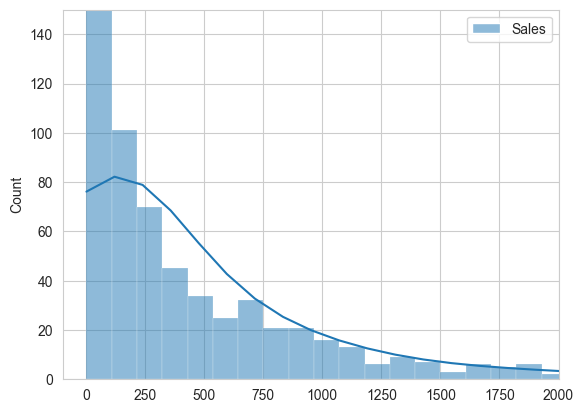

In [13]:
sns.set_style("whitegrid")
sns.histplot(df_plot, kde=True, color='blue')
plt.xlim(-100, 2000)  # Adjust the x-axis limits
plt.ylim(0, 150) 

In [14]:
mean = df_plot['Sales'].mean()
sd = df_plot['Sales'].std()

quantile_95 = norm.ppf(0.95, loc = mean, scale = sd)
print('The Quantile corressponding to 0.95 percent: ',quantile_95)


The Quantile corressponding to 0.95 percent:  2359.230211769081


- The graphs show the most orders are small whereas there are only very few large order
- 95% of the sales have the values equal or lower than 2359 

## Bar plot

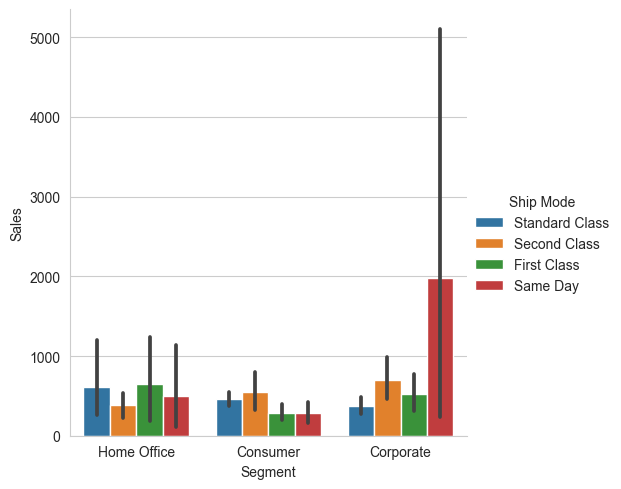

In [15]:
sns.set_style("whitegrid")
sns.catplot(data = df_plot, x = "Segment", y ='Sales',hue = 'Ship Mode',kind = 'bar', errorbar=('ci', 95))

- The graph show the Sales of each Segemnt and their Ship Mdoe
- The estimator here is using mean, therefore there could be outlier that causes high mean confidence interval range (or margin of error)
    - The confidence level is 95% (or 5% alpha)
    - Shows the uncertainty of our estimator
- This graph also assumes our data are random sampled    

## Boxplot

(0.0, 2500.0)

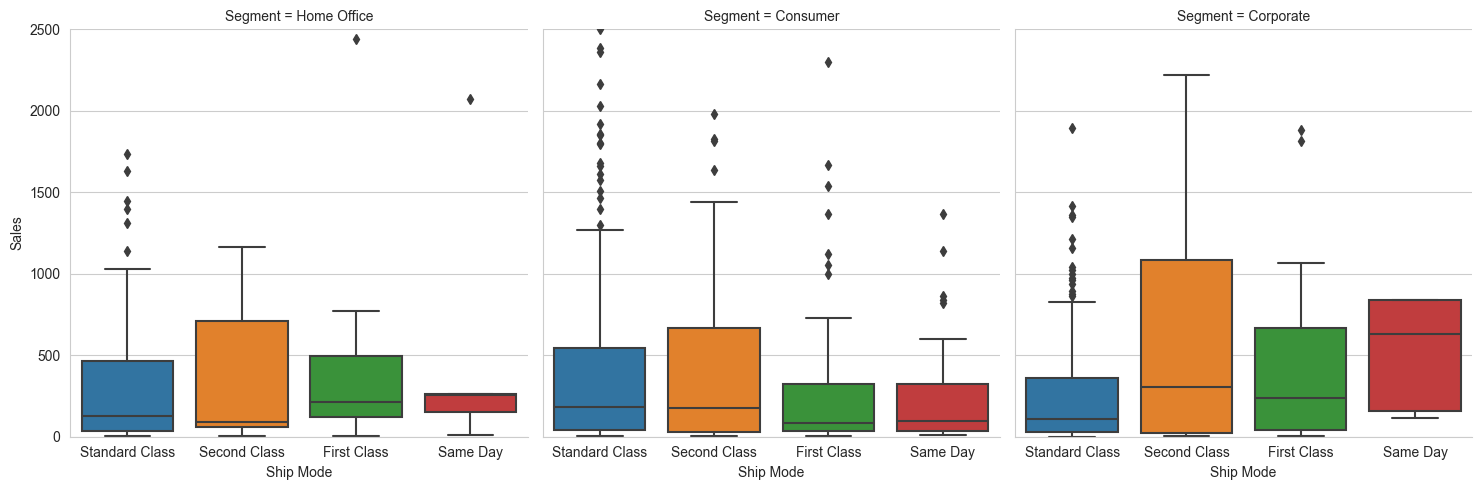

In [16]:
sns.catplot(data = df_plot, x = "Ship Mode", y = "Sales", col = "Segment",kind = 'box')
plt.ylim(0, 2500)

- Looking at the boxplot, we can see that there is a lot of outliers
    - This also proves that most order are small, since all the big orders are consider as outliers

## Point Plot

<AxesSubplot: xlabel='Segment', ylabel='Sales'>

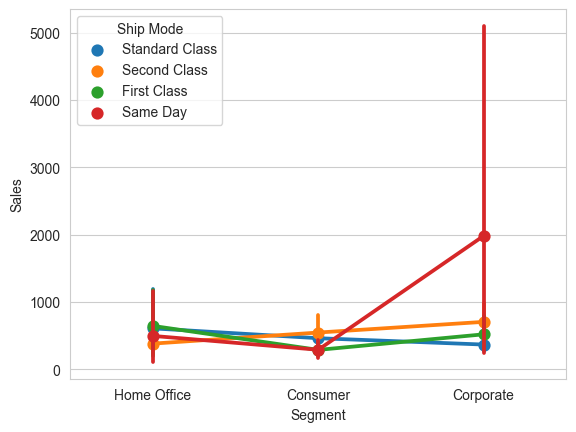

In [17]:
sns.pointplot(x="Segment", y="Sales", data=df_plot, estimator=np.mean, hue = 'Ship Mode')

## Contigency Table (Segment and Ship Mode)

In [18]:
# Draw the contingency table
contingency_table = pd.crosstab(df_plot['Segment'], df_plot['Ship Mode'],margins = True)
print(contingency_table)

Ship Mode    First Class  Same Day  Second Class  Standard Class  All
Segment                                                              
Consumer              72        28            91             253  444
Corporate             40         5            50             152  247
Home Office           12         6            23              90  131
All                  124        39           164             495  822


In [19]:
# We need to remove the 2 Total column and row, this will be use to calculate the expected values table, chi_square and p_value
observed = np.array(contingency_table.iloc[:-1, :-1]) 

from scipy.stats import chi2_contingency
res = chi2_contingency(observed)

# The chi_square value
chi_square = res[0] 
print('The chi_sqare is: ', chi_square)

# The p_value
p_value = res[1] 
print('The p_value is: ', p_value)

# The degrees of freedom
ddof = res[2] 
print('The degrees of freedom is: ', ddof)

# The expected value table
expected = pd.DataFrame(res[3],index = contingency_table.index[:-1], 
                         columns = contingency_table.columns[:-1])
expected

The chi_sqare is:  12.631029848657398
The p_value is:  0.04928409073826164
The degrees of freedom is:  6


Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,66.978102,21.065693,88.583942,267.372263
Corporate,37.260341,11.718978,49.279805,148.740876
Home Office,19.761557,6.215328,26.136253,78.886861


- Base on the expected value table, we can see the expected number of orders of a Segment corresponding with a ship mode
- Base on the Chi_square value we can say that there are associations betweens Segment and Ship Mode
    - We don't know how this association is yet, but we can say that there is one because chi_square <> 0

In [20]:
# Calculate the Pearson Contigency Correlation and Pearson Correct Contigency Correlation
from scipy.stats.contingency import association
K = min(observed.shape)
# Pearson Contigency Correlation
C = association(observed, method = 'pearson')

# Pearson Correct Contigency Correlation
C_correct = C * np.sqrt((K / (K - 1)))

C_correct

0.1506668632783651

- With the Pearson Correct Coefficent Correlation, we can see how strong the correlation is between Ship Mode and Segment

# Correlation between Segment and Sales

In [21]:
# Specify the columns
df = data.loc[:,['Segment','Sales']]
df

,Segment,Sales
0,Home Office,91.056
1,Consumer,129.44
2,Consumer,605.47
3,Corporate,788.86
4,Consumer,13.36
...,...,...
817,Consumer,24.0
818,Corporate,68.742
819,Consumer,1827.51
820,Corporate,8167.42


In [22]:
df['Segment'].replace(to_replace=['Consumer','Corporate','Home Office'], value=[0,1,2],inplace=True)
df

,Segment,Sales
0,2,91.056
1,0,129.44
2,0,605.47
3,1,788.86
4,0,13.36
...,...,...
817,0,24.0
818,1,68.742
819,0,1827.51
820,1,8167.42


- Event though we Encode the Segment into numberic, the fact that it is Categorical data cannot be change
- Therefore, it is useless to draw a scatter diagram, instead, the bar chart above would provide more information on the matter

In [23]:
# Calculate the Correlation by using the Point Biserial Correlation Coefficient
from scipy import stats
corr = stats.pointbiserialr(df['Segment'], df['Sales'])
print('Point Biserial Correlation Coefficient:', corr[0])

Point Biserial Correlation Coefficient: 0.03975108395715276


# Correlation between Ship Mode and Sales

In [24]:
# Specify the columns
df_Ship_Sales = data.loc[:,['Ship Mode','Sales']]
df_Ship_Sales

,Ship Mode,Sales
0,Standard Class,91.056
1,Second Class,129.44
2,Standard Class,605.47
3,Standard Class,788.86
4,Second Class,13.36
...,...,...
817,Standard Class,24.0
818,Standard Class,68.742
819,Second Class,1827.51
820,Same Day,8167.42


In [25]:
df_Ship_Sales['Ship Mode'].replace(to_replace=['First Class','Second Class','Standard Class' , 'Same Day'], value=[0,1,2,3],inplace=True)
df_Ship_Sales

,Ship Mode,Sales
0,2,91.056
1,1,129.44
2,2,605.47
3,2,788.86
4,1,13.36
...,...,...
817,2,24.0
818,2,68.742
819,1,1827.51
820,3,8167.42


In [88]:
# Calculate the Correlation by using the Point Biserial Correlation Coefficient
from scipy import stats
corr = stats.pointbiserialr(df_Ship_Sales['Ship Mode'], df_Ship_Sales['Sales'])
print('Point Biserial Correlation Coefficient:', corr[0])

Point Biserial Correlation Coefficient: 0.008406539486511284


# Summary

Based on all the correlation scores and graphs we can conclude;
- All the variables are not independent
- The associations between variables are very low
- Due to high interval, this shows the uncertainty of our estimator in average sales
- Most Orders have a small price, specificly 95% orders are bellow 2359

# Linear Regression

In [ ]:
#Ploting the scatter plot
plt.xlabel('Ship Mode',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.grid()
plt.scatter(df_Ship_Sales['Ship Mode'], df_Ship_Sales['Sales'], color='blue', marker='o')

In [29]:
#Building the model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

model=linear_model.LinearRegression()

# We don't really care about Traning and testing data in Linear Reg

model.fit(df_Ship_Sales[['Ship Mode']], df_Ship_Sales['Sales']) 
y_pred=model.predict(df_Ship_Sales[['Ship Mode']])

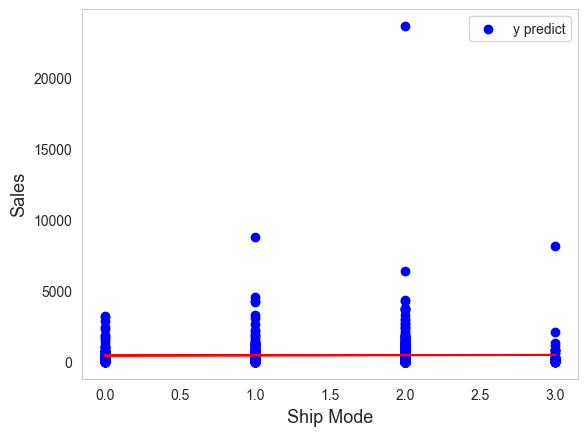

In [30]:
# Plot the Linear Regression
plt.xlabel('Ship Mode',fontsize=13)
plt.ylabel('Sales',fontsize=13)
plt.scatter(df_Ship_Sales['Ship Mode'], df_Ship_Sales['Sales'], color='blue', marker='o')
plt.plot(df_Ship_Sales['Ship Mode'],y_pred, color='red')
plt.legend(['y predict'])
plt.grid()

In [59]:
from sklearn.metrics import r2_score
Ac=r2_score(df['Sales'], y_pred)
print('The accuracy of this model is:R-square=',"{:.2f}".format(Ac))

The accuracy of this model is:R-square= 0.00


- Due to the characteristics of the Ship mode columns and the fact that most orders have low sales, we can't uses Linear regession
- Linear regression not suitable for this case

# Decision Tree and Random Forest

- Before implementing the model, we have to split the continouse values of sales into intervals
- We approach this matter in 2 ways:
    - Only consider the size of the sample (Sturges's Formula)
    - Consider the sample size and the sample distribution (Scott's Normal Reference Rule)

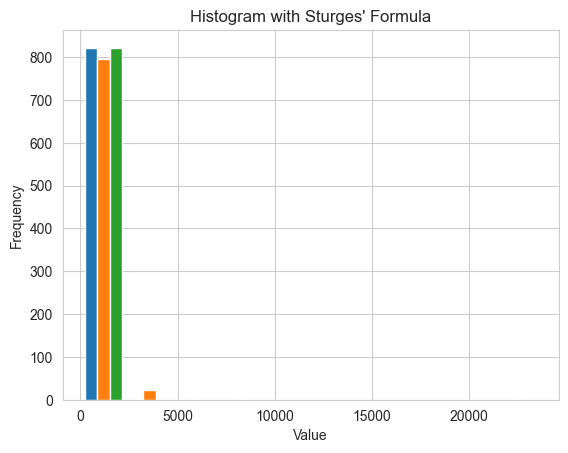

10

In [56]:
n = len(df_Ship_Sales)
# Sturges's Formula
num_bins_Sturges = int(1 + np.log2(n))

# Create histogram
plt.hist(df_Ship_Sales, bins=num_bins_Sturges)
plt.title('Histogram with Sturges\' Formula')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
num_bins_Sturges

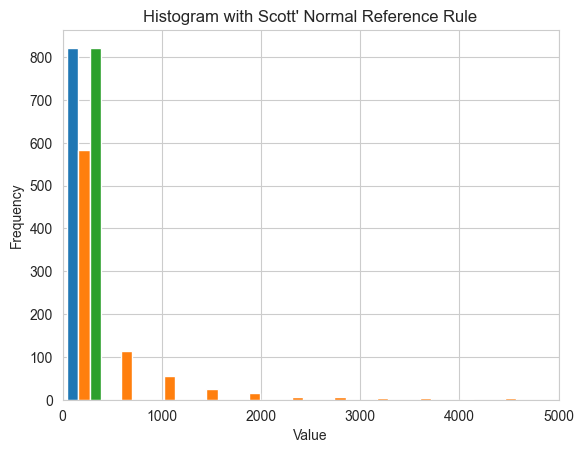

In [58]:
# Scott's Normal Reference Rule
bin_width = 3.5 * np.std(df_Ship_Sales['Sales']) / np.power(n, 1/3)
num_bins_Scott = int((max(df_Ship_Sales['Sales']) - min(df_Ship_Sales['Sales'])) / bin_width)


# Create histogram
plt.hist(df_Ship_Sales, bins=num_bins_Scott)
plt.title('Histogram with Scott\' Normal Reference Rule')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xlim(0,5000)
plt.show()


In [60]:
# Define the range of values
min_value = df_Ship_Sales['Sales'].min()
max_value = df_Ship_Sales['Sales'].max()
max_value,min_value

# Compute bin edges
bin_edges_Sturges = pd.cut(df_Ship_Sales['Sales'], bins=num_bins_Sturges, labels=False, retbins=True)[1]
bin_edges_Scott = pd.cut(df_Ship_Sales['Sales'], bins=num_bins_Scott, labels=False, retbins=True)[1]

# Bin the continuous values
df_Ship_Sales['Scott'] = pd.cut(df_Ship_Sales['Sales'], bins=bin_edges_Scott, labels=False)
df_Ship_Sales['Sturges'] = pd.cut(df_Ship_Sales['Sales'], bins=bin_edges_Sturges, labels=False)
df_Ship_Sales

,Ship Mode,Sales,discrete_column,Scott,Sturges
0,2,91.056,0,0,0
1,1,129.44,0,0,0
2,2,605.47,1,1,0
3,2,788.86,1,1,0
4,1,13.36,0,0,0
...,...,...,...,...,...
817,2,24.0,0,0,0
818,2,68.742,0,0,0
819,1,1827.51,4,4,0
820,3,8167.42,18,18,3


In [80]:
# Prepare data for train test split
from sklearn.model_selection import train_test_split
# This is using Scott's Normal Reference Rule
X_train_Scott, X_test_Scott, y_train_Scott, y_test_Scott = train_test_split(df_Ship_Sales['Ship Mode'], df_Ship_Sales['Scott'],test_size=0.6)

# This is usimg the Surges's Formula
X_train_Sturges, X_test_Sturges, y_train_Sturges, y_test_Sturges = train_test_split(df_Ship_Sales['Ship Mode'], df_Ship_Sales['Sturges'],test_size=0.1) 

- We will be using the decision tree model and Random Forest model for this same training and testing data

In [83]:
from sklearn.ensemble import RandomForestClassifier
model_rf_Sturges = RandomForestClassifier(n_estimators=100)
model_rf_Sturges.fit(np.array(X_train_Sturges).reshape(-1, 1), y_train_Sturges)
score_Sturges = model_rf_Sturges.score(np.array(X_test_Sturges).reshape(-1, 1), y_test_Sturges)


model_rf_Scott = RandomForestClassifier(n_estimators=100)
model_rf_Scott.fit(np.array(X_train_Scott).reshape(-1, 1), y_train_Scott)
score_Scott= model_rf_Scott.score(np.array(X_test_Scott).reshape(-1, 1), y_test_Scott)
score_Sturges,score_Scott

(0.9879518072289156, 0.7044534412955465)

In [84]:
from sklearn import tree
model_tree_Sturges = tree.DecisionTreeClassifier() 
model_tree_Sturges.fit(np.array(X_train_Sturges).reshape(-1, 1), y_train_Sturges)
score_tree_Sturges = model_tree_Sturges.score(np.array(X_test_Sturges).reshape(-1, 1), y_test_Sturges)


model_tree_Scott = tree.DecisionTreeClassifier() 
model_tree_Scott.fit(np.array(X_train_Scott).reshape(-1, 1), y_train_Scott)
score_tree_Scott= model_tree_Scott.score(np.array(X_test_Scott).reshape(-1, 1), y_test_Scott)
score_tree_Sturges,score_tree_Scott

(0.9879518072289156, 0.7044534412955465)

- The uncommon thing here is that the score of Decision Tree model and Random Forest have the same score
- Some possbile explanation:
    - Simple dataset: The training only contains 1 attribute that can be from 1 to 4, idicating 4 different shipping mode
    - Data size is small: Random Forest would perform better in large data sets

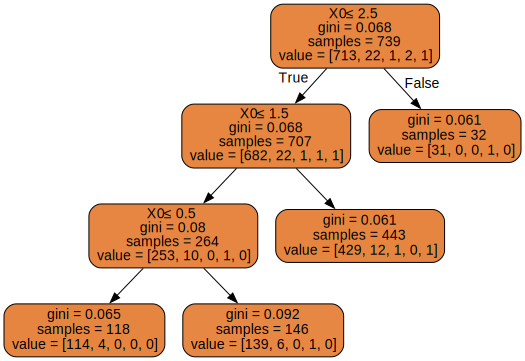

In [85]:
import graphviz # Visulizing the tree that uses Sturges formula
dot_data = tree.export_graphviz(model_tree_Sturges, out_file=None,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

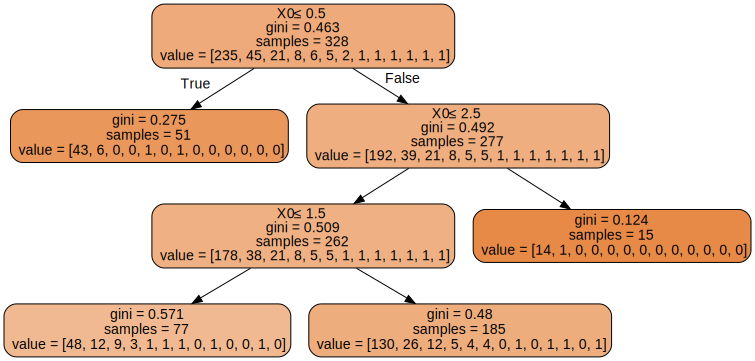

In [86]:
import graphviz # Visulizing the tree that uses Scott's Normal References Rule
dot_data = tree.export_graphviz(model_tree_Scott, out_file=None,filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 